# Titanic Survival Prediction

In this data science project I am building the machine learning model using classification algorithms to predict if the passenger from the titanic survived or not. The dataset is available here https://www.kaggle.com/datasets/yasserh/titanic-dataset.


##  Importing all the necessary libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

Experimenting two classification algorithms ie. K Nearest Neighbor classifier and Random forest classifier

In [ ]:
from sklearn.neighbors import kNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [13]:
df=pd.read_csv("Titanic-Dataset.csv")

## EDA

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking and handling the nan and missing values

In [17]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
df.shape

(891, 10)

Since Cabin has 687 rows of missing values which is more than 70% of total data and name is not an important attribute
so we drop these columns

In [22]:
df.drop(['Name', 'Cabin'], axis=1, inplace=True)

In [29]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
mean_age=df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

In [28]:
df['Embarked'].fillna("S", inplace=True)


In [32]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking how much is the dataset balanced

In [38]:
count=df['Survived'].value_counts()

In [39]:
count

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

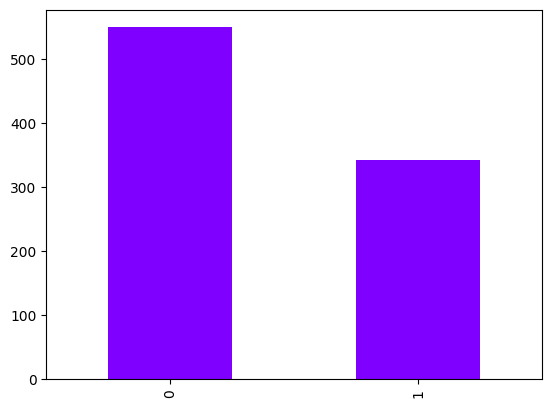

In [44]:
count.plot(kind='bar')


###  Encoding Categorical data